In [178]:
from datasets import load_dataset
import os
# import pytorch_lightning as py
import torch.utils.data as data
import torch
import pandas as pd
import gzip
# import glob
import tarfile
from PIL import Image
import io
from scipy.io import loadmat 
import matplotlib.pyplot as plt
import numpy as np

In [189]:
class DepthDataSet(data.Dataset):
    def __init__(self, path, depth=False):
        # self.files = glob.glob(f"{path}/*.tar.gz")
        self.paths = path
        self.path_file_map = []
        self.data = []
        self.files = os.listdir(path)
        self.labels = []
        self.depth = depth

        for file in self.files:
            # with tarfile.open(file, 'r') as f:
                # data = pd.read_csv(f)
            with tarfile.open(f'{path}/{file}','r:gz') as f:
                for member in f.getmembers():
                    self.data.append(member)
                    # print(member)
                    label = os.path.basename(os.path.dirname(member.name))
                    # print(label)
                    
                    #map the label of the image to the correct file
                    self.labels.append(label)
                    self.path_file_map.append(file)


        # self.label_to_index = {label: i for i, label in enumerate(sorted(set(self.labels)))}

                # print(f.extractall())
                # t_file = f.ex
                # for tarfile in f.extractall():
                    # print(tarfile)
                # self.data.extend([img for img in f.getmembers()])
                # data = pd.read_csv(f.extractall,compression='gzip', header=0, sep=' ', quotechar='"', encoding=bytes)    
                # self.data.append(data)
        
        # self.data = pd.concat(self.data)

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        path = self.path_file_map[index]
        # print('path =',path)

        # path = "Train400Img.tar.gz" if self.labels[index] == "" else self.labels[index]

        # print('data =',self.data[index])
        
        with tarfile.open(f'{self.paths}/{path}', 'r:gz') as tf:
            file = tf.extractfile(self.data[index])
            
            print(file)
            # image = tf.getmember(self.data[index])
            if(self.depth == False):
                img = Image.open(io.BytesIO(file.read()))
            # label = self.label_to_index[self.labels[index]]

                return img
        
            else:
                img = loadmat(io.BytesIO(file.read()))
                img = img.get("depthMap")
                return img

In [190]:
train_img_dataset = DepthDataSet(path='./data/train/imgs')

In [191]:
from scipy.ndimage import rotate

<ExFileObject name='Dataset2_Images/img-combined1-p-108t0.jpg'>


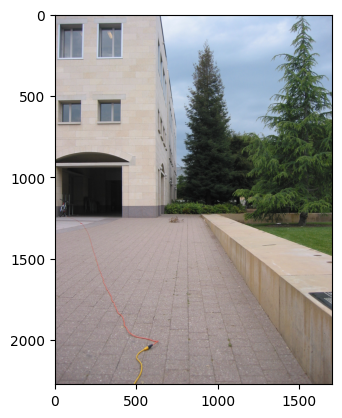

In [192]:
plt.imshow(rotate(train_img_dataset[1],-90,reshape=True))

In [193]:
train_depth_dataset = DepthDataSet(path='./data/train/depths',depth=True)

In [194]:
print((train_depth_dataset))

<ExFileObject name='depthMapData2Trans/depth-combined1-p-220t0.mat'>
<PIL.Image.Image image mode=F size=78x51 at 0x25ACAA62420>


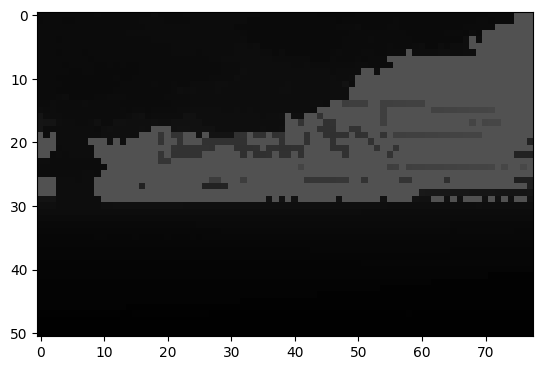

In [195]:
image = train_depth_dataset[6]
print(Image.fromarray(image))
plt.imshow(Image.fromarray(image))

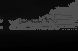

In [196]:
Image.fromarray(image.astype(np.uint8))